# Energy Project By Ashlee Beacom

Data Dictionary (Using cleaned data column titles)

country - the country in question

continent - continent the country belongs to

percent_renewables_2020 - this percent of the energy used in 2020 in the specific country is renewable energy

percent_excluding_hydropower - the percent of the energy used in the specific country minus that produced by hydropower

percent_renewables_2015 - this percent of the energy used in 2015 in the specific country is renewable energy

percent_difference_2015_to_2020 - the change in renewable energy percentage from 2015 to 2020

all_electricity_generation - the total amount of electricity generated in specific country in gigawatt-hour(GwH)

all_renewables - total renewable energy generated in specific country in gigawatt-hour(GwH)

non_hydro_renewables - total renewable energy generated in specific country besides hydropwer in gigwatt-hour(GwH)


### Abstract

Renewable energy is energy that is created from resources that are naturally replenishing on a human timescale. These sources are inexhaustable, (mostly)sustainable, and therefore better for the environment than traditional non-renewable energy sources. Renewable energy sources include wind, solar, hydro, geothermal, and biomass. Hydropower is left out in some categories below because although it is a renewable resource, it has been practically maxxed out. There are very few places left that could support a hydroelectric dam that do not already have one. Filtering out hydropower can give a better look at how the other types of resources are doing. 

Questions:
What continent generates the most renewable energy? What country?
Is the overall trend of the world going towards generating more renewable energy?

Hypothesis: 
The amount of renewable energy generated worldwide is on an upward trend. 

I have imported all libraries that I may use

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I loaded in my data

In [5]:
data = pd.read_csv("renewable electricity by country -  renewable electricity by country.csv")
data

,See the visualisation!,continent,all renewables,Unnamed: 3,excluding hydropower,all renewables 2015,Unnamed: 6,% difference 2015 vs 2020,all electricity generation,all renewables.1,non-hydro renewables,story,story source
0,https://informationisbeautiful.net/visualizati...,NaN,2020 or latest year,NaN,NaN,NaN,NaN,NaN,GWh,GWh,GWh,NaN,https://www.eia.gov/international/data/world/e...
1,Afghanistan,Asia,82.8%,82.8%,3.8%,86.1%,NaN,-3.29%,1.1,0.9,0.04,NaN,NaN
2,Albania,Europe,100.0%,100.0%,0.4%,100.0%,NaN,0.00%,5.2,5.2,0.02,NaN,NaN
3,Algeria,Africa,1.1%,1.1%,0.9%,0.3%,NaN,0.79%,76.7,0.8,0.69,NaN,NaN
4,American Samoa,Oceania,0.0%,0.0%,0.0%,NaN,NaN,NaN,0.2,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Venezuela,S. America,68.4%,68.4%,0.1%,64.9%,NaN,3.50%,105.4,72.1,0.10,NaN,NaN
210,Vietnam,Asia,28.2%,28.2%,3.9%,37.9%,NaN,-9.70%,214.1,60.4,8.38,NaN,NaN
211,Yemen,Asia,14.6%,14.6%,14.6%,NaN,NaN,NaN,3.4,0.5,0.50,NaN,NaN
212,Zambia,Africa,87.0%,87.0%,1.4%,97.1%,NaN,-10.14%,16.0,13.9,0.23,NaN,NaN


Column 3 is an identical repeat of column 2. Column 6 and 11 are entirely empty. Column 12 contains a link to the website where the data was taken from and nothing else. I have dropped all of these columns.

In [6]:
columns_to_drop = [3, 6, 11, 12]
data = data.drop(columns=data.columns[columns_to_drop])
data

,See the visualisation!,continent,all renewables,excluding hydropower,all renewables 2015,% difference 2015 vs 2020,all electricity generation,all renewables.1,non-hydro renewables
0,https://informationisbeautiful.net/visualizati...,NaN,2020 or latest year,NaN,NaN,NaN,GWh,GWh,GWh
1,Afghanistan,Asia,82.8%,3.8%,86.1%,-3.29%,1.1,0.9,0.04
2,Albania,Europe,100.0%,0.4%,100.0%,0.00%,5.2,5.2,0.02
3,Algeria,Africa,1.1%,0.9%,0.3%,0.79%,76.7,0.8,0.69
4,American Samoa,Oceania,0.0%,0.0%,NaN,NaN,0.2,0.0,0.00
...,...,...,...,...,...,...,...,...,...
209,Venezuela,S. America,68.4%,0.1%,64.9%,3.50%,105.4,72.1,0.10
210,Vietnam,Asia,28.2%,3.9%,37.9%,-9.70%,214.1,60.4,8.38
211,Yemen,Asia,14.6%,14.6%,NaN,NaN,3.4,0.5,0.50
212,Zambia,Africa,87.0%,1.4%,97.1%,-10.14%,16.0,13.9,0.23


The first row has a link in some addition column information contained in it. I have dropped this row but made note of important details. 

In [7]:
data = data.drop(index=0)
data

,See the visualisation!,continent,all renewables,excluding hydropower,all renewables 2015,% difference 2015 vs 2020,all electricity generation,all renewables.1,non-hydro renewables
1,Afghanistan,Asia,82.8%,3.8%,86.1%,-3.29%,1.1,0.9,0.04
2,Albania,Europe,100.0%,0.4%,100.0%,0.00%,5.2,5.2,0.02
3,Algeria,Africa,1.1%,0.9%,0.3%,0.79%,76.7,0.8,0.69
4,American Samoa,Oceania,0.0%,0.0%,NaN,NaN,0.2,0.0,0.00
5,Angola,Africa,68.2%,1.6%,54.5%,13.72%,13.6,9.2,0.22
...,...,...,...,...,...,...,...,...,...
209,Venezuela,S. America,68.4%,0.1%,64.9%,3.50%,105.4,72.1,0.10
210,Vietnam,Asia,28.2%,3.9%,37.9%,-9.70%,214.1,60.4,8.38
211,Yemen,Asia,14.6%,14.6%,NaN,NaN,3.4,0.5,0.50
212,Zambia,Africa,87.0%,1.4%,97.1%,-10.14%,16.0,13.9,0.23


I renamed the first column to country

In [8]:
data.rename(columns={'See the visualisation!':'country'}, inplace=True)
data.head()

,country,continent,all renewables,excluding hydropower,all renewables 2015,% difference 2015 vs 2020,all electricity generation,all renewables.1,non-hydro renewables
1,Afghanistan,Asia,82.8%,3.8%,86.1%,-3.29%,1.1,0.9,0.04
2,Albania,Europe,100.0%,0.4%,100.0%,0.00%,5.2,5.2,0.02
3,Algeria,Africa,1.1%,0.9%,0.3%,0.79%,76.7,0.8,0.69
4,American Samoa,Oceania,0.0%,0.0%,NaN,NaN,0.2,0.0,0.00
5,Angola,Africa,68.2%,1.6%,54.5%,13.72%,13.6,9.2,0.22


I renamed many of the columns to more functional and speccific names. 

In [9]:
data.rename(columns={'all renewables':'percent_renewables_2020'}, inplace=True)
data.rename(columns={'excluding hydropower': 'percent_excluding_hydropower'}, inplace=True)
data.rename(columns={'all renewables 2015': 'percent_renewables_2015'}, inplace=True)
data.rename(columns={'% difference 2015 vs 2020': 'percent_difference_2015_to_2020'}, inplace=True)
data.rename(columns={'all electricity generation': 'all_electricity_generation'}, inplace=True)
data.rename(columns={'all renewables.1': 'all_renewables'}, inplace=True)
data.rename(columns={'non-hydro renewables': 'non_hydro_renewables'}, inplace=True)
data.head()

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
1,Afghanistan,Asia,82.8%,3.8%,86.1%,-3.29%,1.1,0.9,0.04
2,Albania,Europe,100.0%,0.4%,100.0%,0.00%,5.2,5.2,0.02
3,Algeria,Africa,1.1%,0.9%,0.3%,0.79%,76.7,0.8,0.69
4,American Samoa,Oceania,0.0%,0.0%,NaN,NaN,0.2,0.0,0.00
5,Angola,Africa,68.2%,1.6%,54.5%,13.72%,13.6,9.2,0.22


Check the datatypes and null value counts of all columns.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 1 to 213
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   country                          213 non-null    object
 1   continent                        213 non-null    object
 2   percent_renewables_2020          213 non-null    object
 3   percent_excluding_hydropower     213 non-null    object
 4   percent_renewables_2015          174 non-null    object
 5   percent_difference_2015_to_2020  174 non-null    object
 6   all_electricity_generation       213 non-null    object
 7   all_renewables                   213 non-null    object
 8   non_hydro_renewables             213 non-null    object
dtypes: object(9)
memory usage: 15.1+ KB


Check for duplicate data. None is found. 

In [11]:
data[data.duplicated(keep=False)].head()

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables


check for missing data

In [12]:
data[data.percent_renewables_2015.isnull()].head()

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
4,American Samoa,Oceania,0.0%,0.0%,NaN,NaN,0.2,0.0,0.00
6,Antarctica,Antarctica,0.0%,0.0%,NaN,NaN,0.0,0.0,0.00
7,Antigua & Barbuda,N. America,4.4%,4.4%,NaN,NaN,0.3,0.0,0.02
16,Barbados,N. America,3.9%,3.9%,NaN,NaN,1.0,0.0,0.04
21,Bermuda,N. America,0.0%,0.0%,NaN,NaN,0.6,0.0,0.00


remove the '%' from data

In [13]:
remove_percent = ['percent_renewables_2020', 'percent_excluding_hydropower', 'percent_renewables_2015', 'percent_difference_2015_to_2020']
data[remove_percent] = data[remove_percent].applymap(lambda x: str(x).replace('%', ''))

change datatypes from object to float64 for columns 3-9

In [14]:
float_columns = data.columns[2:9]
data[float_columns] = data[float_columns].astype('float64')
data.head()

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
1,Afghanistan,Asia,82.8,3.8,86.1,-3.29,1.1,0.9,0.04
2,Albania,Europe,100.0,0.4,100.0,0.00,5.2,5.2,0.02
3,Algeria,Africa,1.1,0.9,0.3,0.79,76.7,0.8,0.69
4,American Samoa,Oceania,0.0,0.0,NaN,NaN,0.2,0.0,0.00
5,Angola,Africa,68.2,1.6,54.5,13.72,13.6,9.2,0.22


I do not want to deal with any missing values in my research. I dropped all records with null values. I saved the cleaned data in a new object.

In [15]:
clean_data = data.dropna()
clean_data

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
1,Afghanistan,Asia,82.8,3.8,86.1,-3.29,1.1,0.9,0.04
2,Albania,Europe,100.0,0.4,100.0,0.00,5.2,5.2,0.02
3,Algeria,Africa,1.1,0.9,0.3,0.79,76.7,0.8,0.69
5,Angola,Africa,68.2,1.6,54.5,13.72,13.6,9.2,0.22
8,Argentina,S. America,27.1,9.5,30.7,-3.64,137.8,37.3,13.02
...,...,...,...,...,...,...,...,...,...
208,Vanuatu,Oceania,14.9,14.9,9.1,5.76,0.1,0.0,0.01
209,Venezuela,S. America,68.4,0.1,64.9,3.50,105.4,72.1,0.10
210,Vietnam,Asia,28.2,3.9,37.9,-9.70,214.1,60.4,8.38
212,Zambia,Africa,87.0,1.4,97.1,-10.14,16.0,13.9,0.23


I see that the percent of renewables in 2020 are only slightly higher than the percent renewables in 2015. The percent_difference_2015_to_2020 column shows me that there were many countries that are decreasing their renewable energy production. By looking at the all_renewables column and the non_hydro_renewables column, I see that hydropower accounts for more than half of all renewable energy. 

In [16]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_renewables_2020,174.0,39.541379,31.361368,0.00,12.7000,31.300,64.3750,100.00
percent_excluding_hydropower,174.0,10.620690,13.923583,0.00,0.8250,4.650,15.1250,85.10
percent_renewables_2015,174.0,37.933333,31.965332,0.00,9.1250,30.700,61.5250,100.00
percent_difference_2015_to_2020,174.0,1.608506,11.079220,-59.04,-1.1025,2.040,6.6175,28.55
all_electricity_generation,174.0,147.240230,669.208262,0.00,2.4750,15.550,69.5000,7601.20
all_renewables,174.0,43.655747,189.789212,0.00,0.5000,4.250,18.8750,2220.50
non_hydro_renewables,174.0,18.482299,82.416943,0.00,0.0400,0.435,5.4325,865.29


checking to make sure all columns have the correct datatypes now. 

In [17]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 1 to 213
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          174 non-null    object 
 1   continent                        174 non-null    object 
 2   percent_renewables_2020          174 non-null    float64
 3   percent_excluding_hydropower     174 non-null    float64
 4   percent_renewables_2015          174 non-null    float64
 5   percent_difference_2015_to_2020  174 non-null    float64
 6   all_electricity_generation       174 non-null    float64
 7   all_renewables                   174 non-null    float64
 8   non_hydro_renewables             174 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.6+ KB


save clean data as a pickle

In [18]:
clean_data.to_pickle('clean_data.pkl')

sort the data in order from largest percent difference in renewable energy from 2015 to 2020 to smallest.

In [19]:
clean_data.sort_values('percent_difference_2015_to_2020', ascending=False)

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
170,Sierra Leone,Africa,91.4,4.8,62.9,28.55,0.2,0.2,0.01
61,Estonia,Europe,44.2,43.5,16.5,27.69,5.9,2.6,2.57
56,Ecuador,S. America,81.2,1.9,54.1,27.07,31.3,25.4,0.59
112,Lithuania,Europe,71.3,49.5,48.1,23.23,4.9,3.5,2.41
204,United Kingdom,Europe,47.1,44.5,27.4,19.68,299.5,141.0,133.37
...,...,...,...,...,...,...,...,...,...
43,Congo Brazzaville,Africa,28.9,0.0,54.6,-25.73,3.7,1.1,0.00
106,Laos,Asia,64.4,0.3,96.5,-32.11,30.0,19.3,0.10
59,Equatorial Guinea,Africa,10.6,0.0,45.9,-35.32,1.1,0.1,0.00
19,Belize,N. America,52.0,16.5,95.2,-43.24,0.8,0.4,0.14


sort by which country generates the most renewables in GwH.

In [20]:
clean_data.sort_values('all_renewables', ascending=False)

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
40,China,Asia,29.2,11.4,25.0,4.21,7601.2,2220.5,865.29
205,United States,N. America,20.9,13.7,14.0,6.91,4050.8,847.0,555.89
26,Brazil,S. America,86.0,20.1,75.0,10.96,622.0,534.7,125.15
36,Canada,N. America,68.8,8.0,64.7,4.12,630.2,433.7,50.69
91,India,Asia,21.7,11.0,15.1,6.62,1452.2,315.4,160.40
...,...,...,...,...,...,...,...,...,...
42,Comoros,Africa,0.4,0.0,3.7,-3.31,0.1,0.0,0.00
165,Sao Tome & Principe,Africa,11.1,0.0,9.1,2.02,0.1,0.0,0.00
164,Samoa,Oceania,29.7,0.1,33.1,-3.40,0.1,0.0,0.00
163,Saint Vincent/Grenadines,N. America,17.2,0.7,16.1,1.14,0.1,0.0,0.00


sort by which countries generate the highest percent of renewable energy in 2020 in GwH

In [21]:
clean_data.sort_values('percent_renewables_2020', ascending=False).head(10)

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
148,Paraguay,S. America,100.0,0.0,100.0,0.00,48.9,48.9,0.00
90,Iceland,Europe,100.0,32.4,100.0,-0.02,18.4,18.4,5.97
131,Nepal,Asia,100.0,2.1,100.0,0.00,4.2,4.2,0.09
22,Bhutan,Asia,100.0,0.0,100.0,0.00,9.0,9.0,0.00
109,Lesotho,Africa,100.0,0.2,100.0,0.00,0.5,0.5,0.00
2,Albania,Europe,100.0,0.4,100.0,0.00,5.2,5.2,0.02
63,Ethiopia,Africa,100.0,4.1,100.0,-0.04,14.2,14.1,0.59
44,Congo Kinshasa,Africa,99.9,0.6,99.8,0.15,9.2,9.2,0.06
46,Costa Rica,N. America,99.8,28.7,99.1,0.71,11.7,11.6,3.35
38,Central African Republic,Africa,99.4,0.0,86.2,13.18,0.2,0.2,0.00


In [22]:
unique_continents = clean_data['continent'].unique()
unique_continents

array(['Asia', 'Europe', 'Africa', 'S. America', 'Oceania', 'N. America',
       'Europe/Asia'], dtype=object)

I checked to see what continents were accounted for in the data. I see Antarctica is not represented but Europe/Asia does have data.

In [23]:
counts_continents = clean_data['continent'].value_counts()
counts_continents

Africa         47
Asia           40
Europe         40
N. America     23
S. America     14
Oceania         8
Europe/Asia     2
Name: continent, dtype: int64

This shows the number of countries each continent has data for. 

In [24]:
eurasia_records = clean_data.loc[clean_data['continent'] == 'Europe/Asia']
eurasia_records

,country,continent,percent_renewables_2020,percent_excluding_hydropower,percent_renewables_2015,percent_difference_2015_to_2020,all_electricity_generation,all_renewables,non_hydro_renewables
157,Russia,Europe/Asia,19.7,0.6,16.9,2.80,1027.5,202.4,6.37
196,Turkey,Europe/Asia,43.8,17.5,32.9,10.93,293.8,128.8,51.39


I wanted to check which countries were classified under 'Europe/Asia'

In [25]:
clean_data.percent_difference_2015_to_2020.describe()

count    174.000000
mean       1.608506
std       11.079220
min      -59.040000
25%       -1.102500
50%        2.040000
75%        6.617500
max       28.550000
Name: percent_difference_2015_to_2020, dtype: float64

Over 25% of countries decreased their renewable energy generation. There may be some outliers on both ends of the spectrum. 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'S. America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'N. America'),
  Text(6, 0, 'Europe/Asia')])

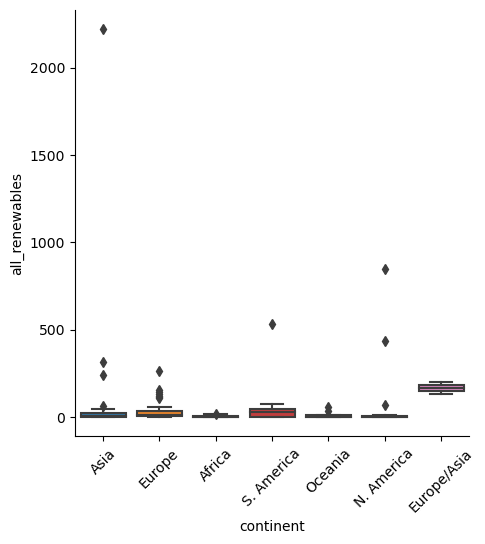

In [26]:
sns.catplot(data=clean_data, kind='box', x='continent', y='all_renewables')
plt.xticks(rotation=45)

Asia has one country that produces a massive amount more renewable energy than anywhere else in the world. 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'S. America'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'N. America'),
  Text(6, 0, 'Europe/Asia')])

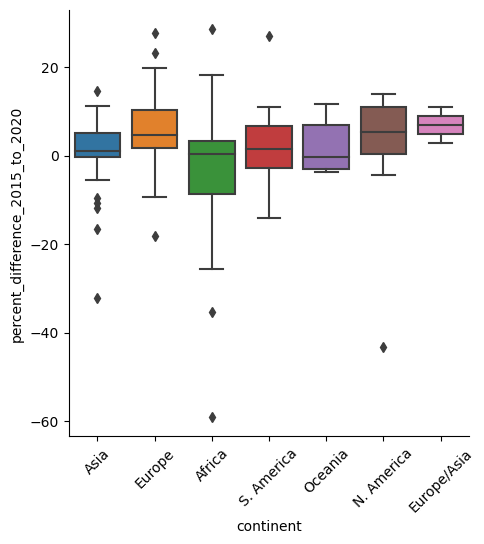

In [27]:
sns.catplot(data=clean_data, kind='box', x='continent', y='percent_difference_2015_to_2020')
plt.xticks(rotation=45)

Africa has a country with the highest percent increase in renewable energy between 2015 and 2020 and also the lowest. Most countries' percent difference is averaging right above zero. Changing energy usage from traditional fuels to renewable ones is not a fast process in most places.

<Axes: title={'center': '% Difference by European country'}, xlabel='country', ylabel='% Difference 2015-2020'>

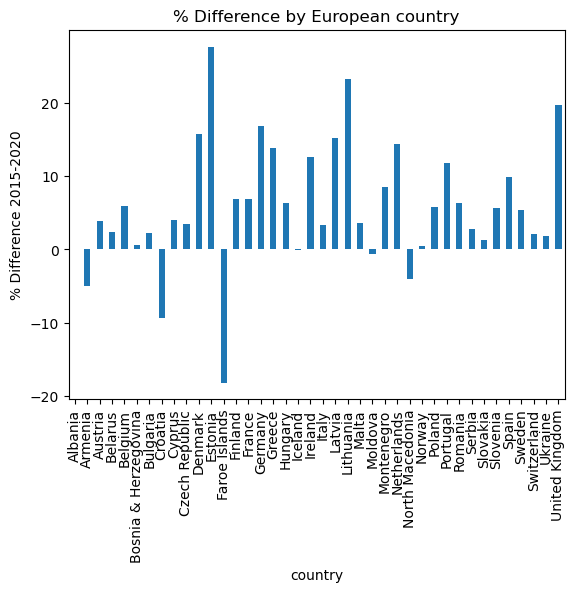

In [28]:
clean_data.query('continent=="Europe"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by European country')

Overall, most countries increased the amount of renewable energy generated. Only 5 out of 40 countries in Europe decreased in renewable energy generation. 

<Axes: title={'center': '% Difference by Asian country'}, xlabel='country', ylabel='% Difference 2015-2020'>

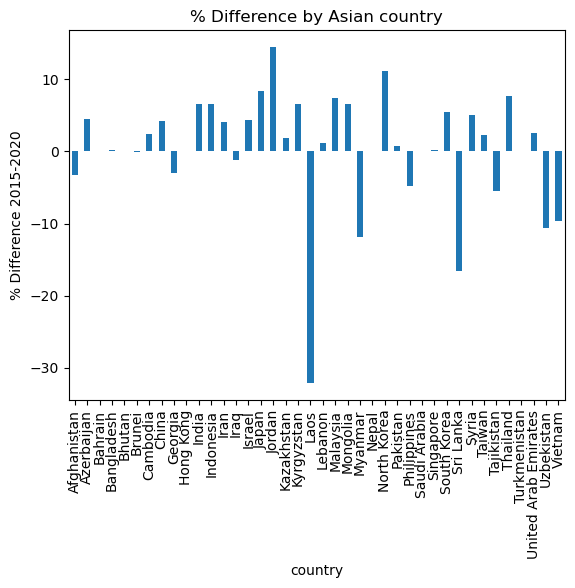

In [37]:
clean_data.query('continent=="Asia"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by Asian country')

10/40 countries in Asia decreased the amount of renewable energy generated. 

<Axes: title={'center': '% Difference by North American country'}, xlabel='country', ylabel='% Difference 2015-2020'>

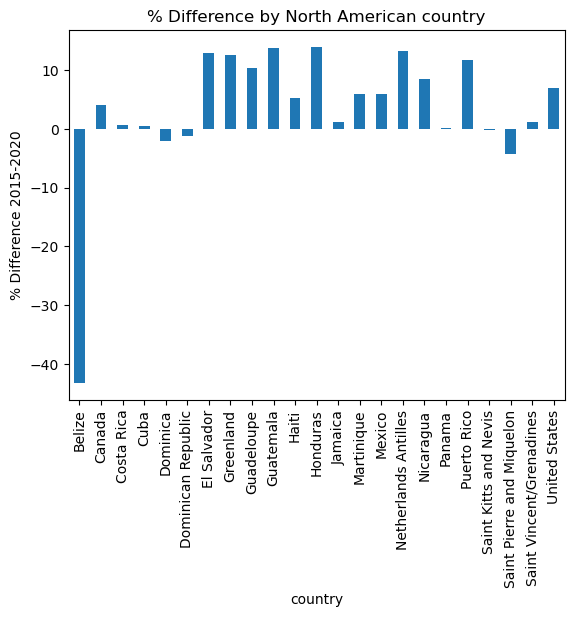

In [35]:
clean_data.query('continent=="N. America"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by North American country')

If you take away Belize, North America overwhelmingly increased their generation of renewable energy. 19/23 countries in North America increased renewable energy generation (Dominicana, Dominican Republic, and Saint Pierre and Miquelon decresed by less than 5%). 

<Axes: title={'center': '% Difference by South American country'}, xlabel='country', ylabel='% Difference 2015-2020'>

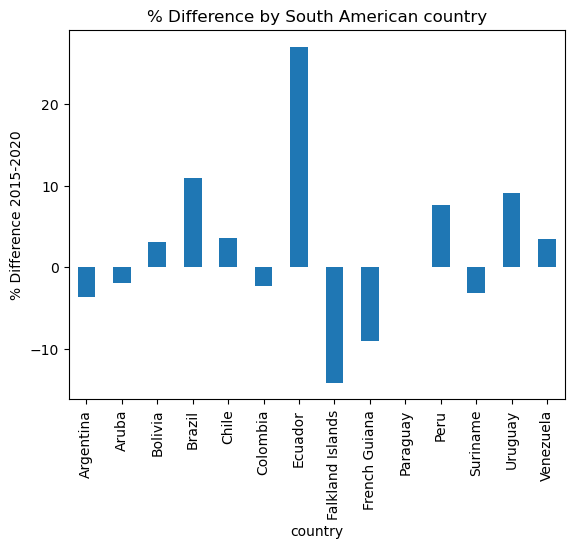

In [36]:
clean_data.query('continent=="S. America"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by South American country')

7/14 increased their renewable energy generation. 50% of the countries in South America decreased or had no change in renewable energy.

<Axes: title={'center': '% Difference by African country'}, xlabel='country', ylabel='% Difference 2015-2020'>

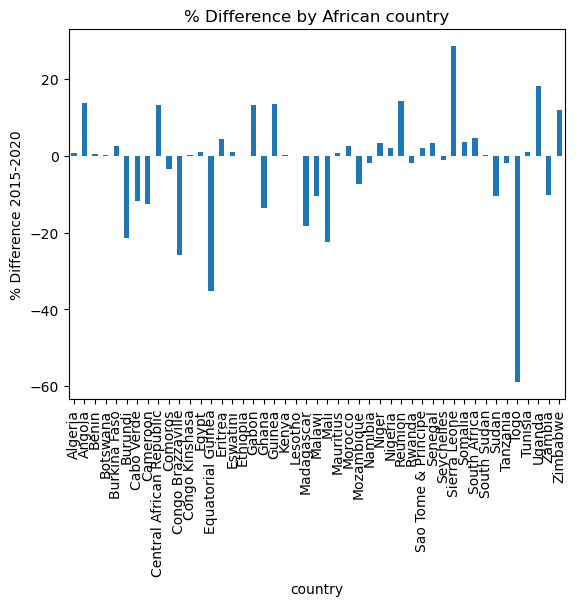

In [34]:
clean_data.query('continent=="Africa"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by African country')

27/47 countries in Africa increased their renewable energy generation. Togo decreased by nearly 60%.

<Axes: title={'center': '% Difference by Eurasian country'}, xlabel='country', ylabel='% Difference 2015-2020'>

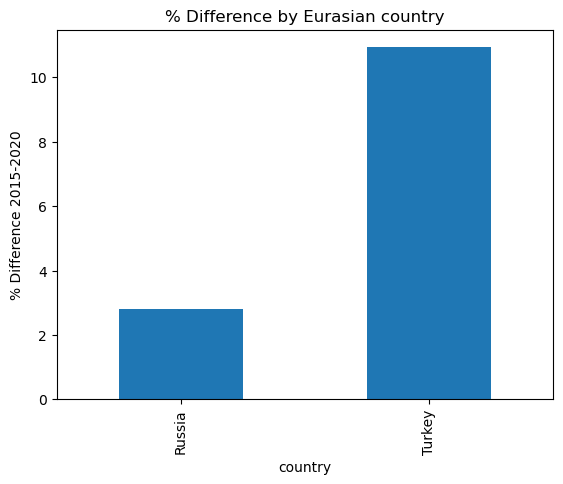

In [38]:
clean_data.query('continent=="Europe/Asia"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by Eurasian country')

Both Eurasian countries increased renewable energy production. 

<Axes: title={'center': '% Difference by Oceania country'}, xlabel='country', ylabel='% Difference 2015-2020'>

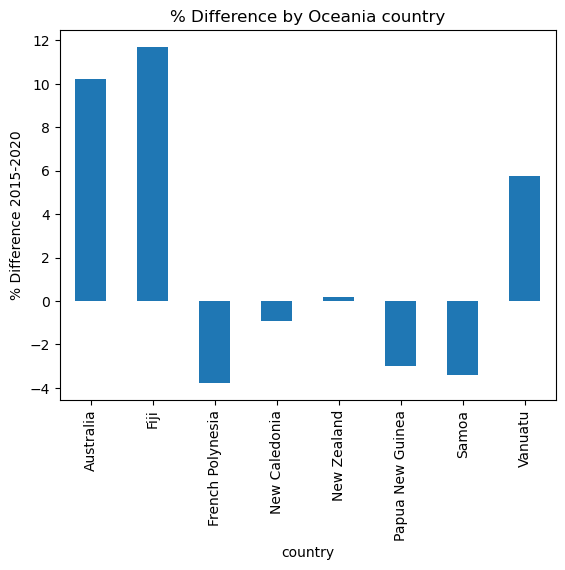

In [39]:
clean_data.query('continent=="Oceania"') \
    .groupby('country').percent_difference_2015_to_2020.max() \
    .plot.bar(ylabel='% Difference 2015-2020',
             title='% Difference by Oceania country')

4/8 countries in Oceania increased their renewable energy production. The 4 countries that decreased did so by less than 4%.

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, 'S. America'),
  Text(0.0, 0, 'Africa'),
  Text(1.0, 0, 'Asia'),
  Text(2.0, 0, 'Europe'),
  Text(3.0, 0, 'Europe/Asia'),
  Text(4.0, 0, 'N. America'),
  Text(5.0, 0, 'Oceania'),
  Text(6.0, 0, 'S. America'),
  Text(7.0, 0, '')])

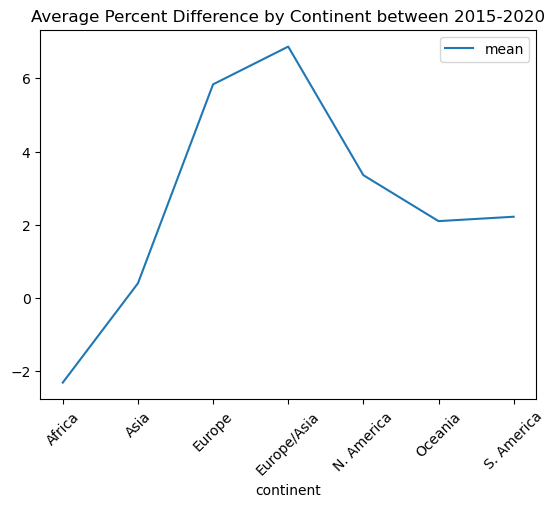

In [44]:
clean_data.groupby('continent').percent_difference_2015_to_2020.agg(['mean']) \
    .plot(title='Average Percent Difference by Continent between 2015-2020')
plt.xticks(rotation=45)

You can see from this map that Europe and Europe/Asia have the greatest increase in renewable energy production. Overall, six of the seven continents averaged an increased in renewable energy production. Africa averaged a just over 2% decrease in renewable energy, largely affected by Togo's 60% decrease. 

My hypothesis seems to be correct. For the most part the world is trending towards greater renewable energy generation. Europe/Asia is leading the world, closely followed by Europe, towards a more sustainable planet. 